In [91]:
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from collections import Counter


In [92]:
datas = ["ee_2015.json","ee_2016.json","ee_2017.json","ee_2018.json","ee_2019.json"]


In [93]:
addz = list()
things = []
for data in datas:
    x = json.load(open(data,"r",encoding='utf-8'))
    for y in tqdm(x):
        if not 'categoryPrimary' in y: continue
        caty = y['categoryPrimary']
        cat = caty['categoryId']
        catyz = caty['channelId']
        if catyz == 14:
            #print(type(catyz))
            pw = caty['categoryName']
            del y['categoryPrimary']
            for key in caty:
                y[key] = caty[key]
            addz.append(y)

100%|███████████████████████████████████████████████████████████████████████| 27375/27375 [00:00<00:00, 1054324.23it/s]


In [94]:
df = pd.DataFrame(addz)

<AxesSubplot:>

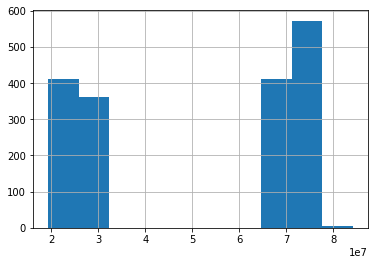

In [95]:
df['categoryId'].hist()

array([[<AxesSubplot:title={'center':'categoryId'}>]], dtype=object)

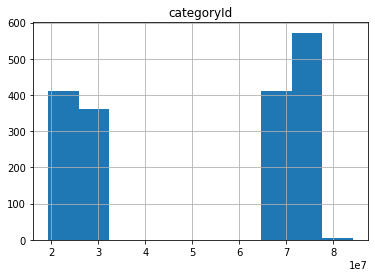

In [96]:
df.hist(column='categoryId')

# Distritubion by tag

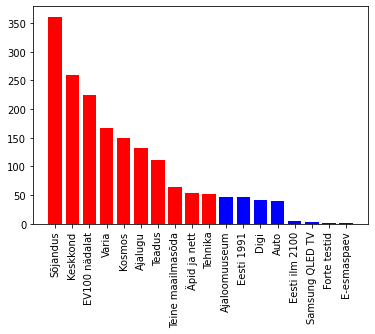

In [98]:
w = Counter(df['categoryName'].tolist()).most_common()
w = dict(w)
colors = ['red' if w[k] >= 50 else 'blue' for k in w]
plt.bar(w.keys(), w.values(),color=colors)
plt.xticks(rotation=90)
plt.show()

In [102]:
plt.savefig('distrib.png')

<Figure size 432x288 with 0 Axes>

## Distribution by Years

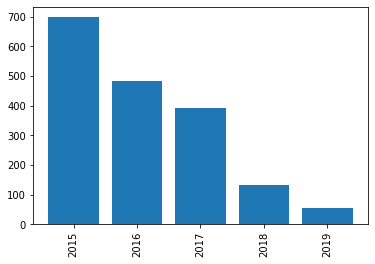

In [121]:
df['publishDate'] =  pd.to_datetime(df['publishDate'], format="%Y-%m-%dT%H:%M:%S.%f")
ws = Counter(df['publishDate'].dt.year).most_common()
ws = dict(ws)
plt.bar(ws.keys(), ws.values())
plt.xticks(rotation=90)
plt.show()

In [101]:
df.to_csv("estonian_channel_14.tsv",sep='\t',encoding='utf-8',index=None)

In [107]:
df2 = pd.DataFrame()
df2['id'] = df['id']
df2['text_a'] = df['title']+" "+df['lead']
df2['label'] = df['categoryName']

In [108]:
df2.to_csv('dataset.tsv',sep='\t',encoding='utf-8',index=None)